In [57]:
import numpy as np
import matplotlib.pyplot as plt

Pixels = 100
Area = 200
wide_bright = 30 
wide_dark = 50
cycle_length = wide_bright + wide_dark

x = np.linspace(0, Area , Pixels)
y = np.linspace(0, Area , Pixels)
x , Y  = np.meshgrid(x,y)

pattern_mask = (x % cycle_length) < wide_bright 
Image = np.zeros((Pixels,Pixels))
Image[pattern_mask] = 10000
Image[~pattern_mask] = 500

noise_level = 2000
noise = np.random.normal(0 , noise_level , Image.shape )
Image_noise = Image + noise

#FFT
F = np.fft.fft2(Image_noise)
Fshift = np.fft.fftshift(F)
magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)


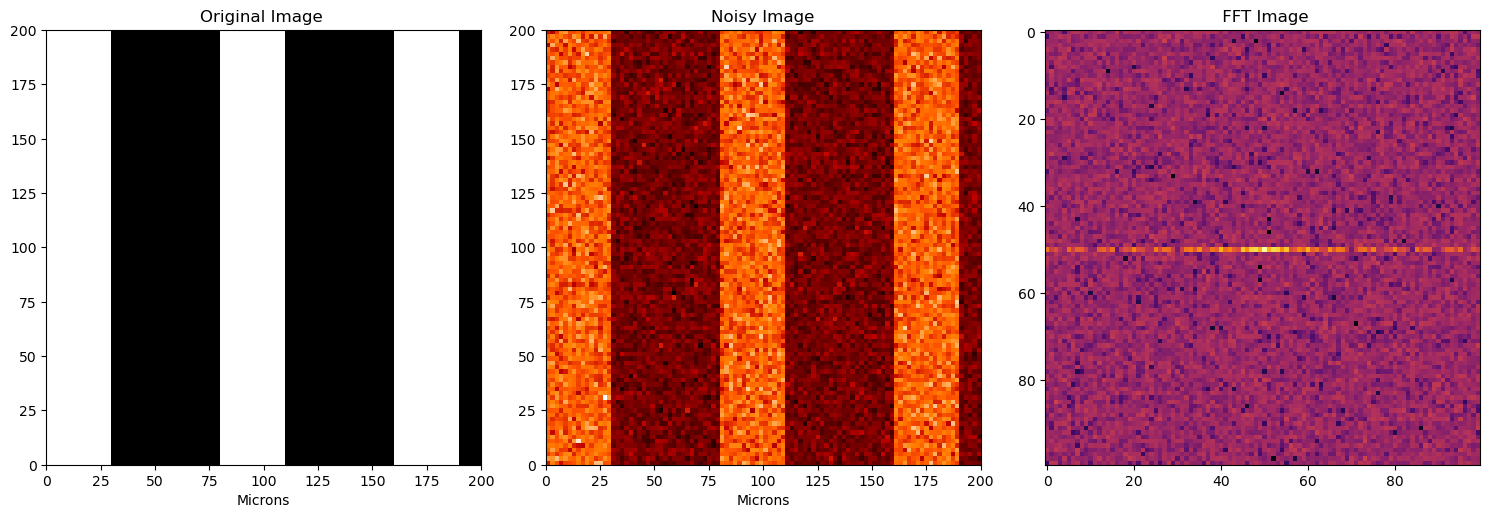

In [58]:
plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
plt.title('Original Image ')
plt.xlabel('Microns')


plt.subplot(132)
plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
plt.title('Noisy Image')
plt.xlabel('Microns')


plt.subplot(133)
plt.imshow(magnitude_spectrum, cmap='inferno') 
plt.title(' FFT Image')

plt.tight_layout()
plt.show()

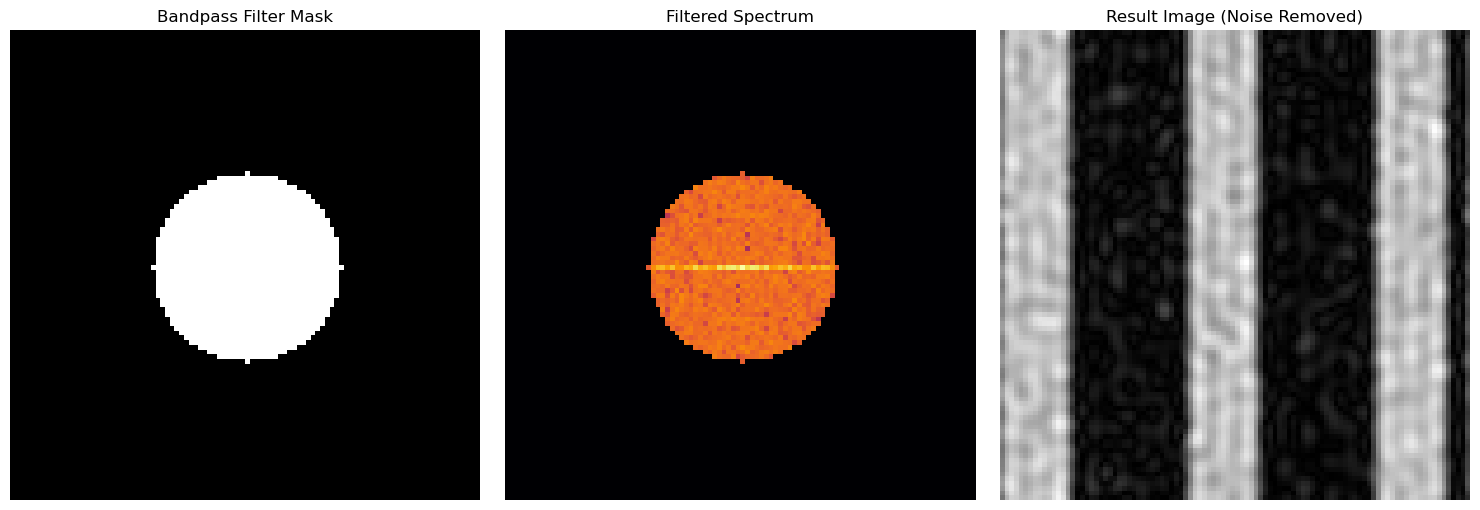

In [61]:
# --- สร้าง Bandpass Filter ---
rows, cols = Image.shape
crow, ccol = int(rows/2), int(cols/2) # หาจุดกึ่งกลาง

# กำหนดรัศมี (Radius) สำหรับ Bandpass
# r_inner: รัศมีวงใน (ตัดความถี่ต่ำ/DC) -> ถ้าอยากเก็บความสว่างภาพไว้ ให้ตั้งเป็น 0
# r_outer: รัศมีวงนอก (ตัดความถี่สูง/Noise) -> ค่ายิ่งน้อย ภาพยิ่งเบลอแต่ Noise หาย
r_inner = 0
r_outer = 20

# สร้าง Mask เป็นรูปโดนัท (Bandpass)
mask = np.zeros((rows, cols), np.uint8)
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = ((x - center[0])**2 + (y - center[1])**2 >= r_inner**2) & \
            ((x - center[0])**2 + (y - center[1])**2 <= r_outer**2)
mask[mask_area] = 1

# ประยุกต์ใช้ Mask กับรูป FFT ที่ Shift แล้ว
fshift_filtered = Fshift * mask

# --- แปลงกลับเป็นรูปภาพ (Inverse FFT) ---
f_ishift = np.fft.ifftshift(fshift_filtered) # Shift กลับ
img_back = np.fft.ifft2(f_ishift)            # Inverse FFT
img_back = np.abs(img_back)                  # เอาเฉพาะขนาด (Magnitude)

# --- แสดงผลลัพธ์ ---
plt.figure(figsize=(15, 5))

# แสดง Mask ที่เราสร้าง
plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Bandpass Filter Mask')
plt.axis('off')

# แสดง Spectrum หลัง Filter
plt.subplot(132)
# ใช้ log เพื่อให้เห็นรายละเอียด Spectrum ชัดขึ้น
magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)
plt.imshow(magnitude_spectrum_filtered, cmap='inferno')
plt.title('Filtered Spectrum')
plt.axis('off')

# แสดงรูปที่กู้คืนมาได้ (Denoised Image)
plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('Result Image (Noise Removed)')
plt.axis('off')

plt.tight_layout()
plt.show()